In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.avragg as avragg
import mlgrad.loss as loss
import mlgrad.regr as regr

In [2]:
df = pd.read_csv("../data/starsCYG.csv", sep=',', index_col='id')
df

,log.Te,log.light
id,,
1,4.37,5.23
2,4.56,5.74
3,4.26,4.93
4,4.56,5.74
5,4.30,5.19
6,4.46,5.46
7,3.84,4.65
8,4.57,5.27
9,4.26,5.57


In [3]:
X = log_Te = df["log.Te"].values
Xs = X[:,None]
Y = log_light = df["log.light"].values
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
N = len(X)
print((N-6)/N)
alpha = 0.84

0.8723404255319149


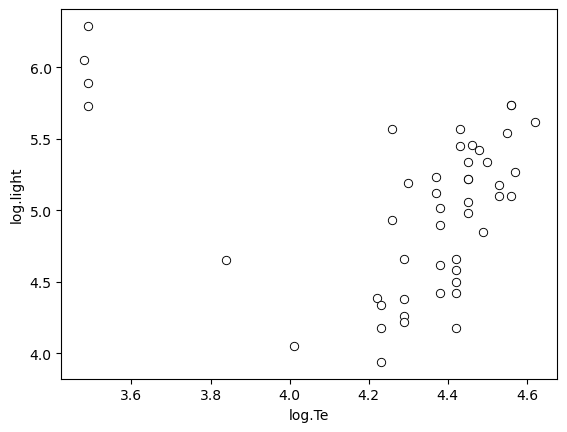

In [4]:
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidth=0.66)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.show()

In [5]:
mod_ls = models.LinearModel(1)
mod_r = models.LinearModel(1)
mod_m = models.LinearModel(1)
mod_wm = models.LinearModel(1)
mod_ls2 = models.LinearModel(1)

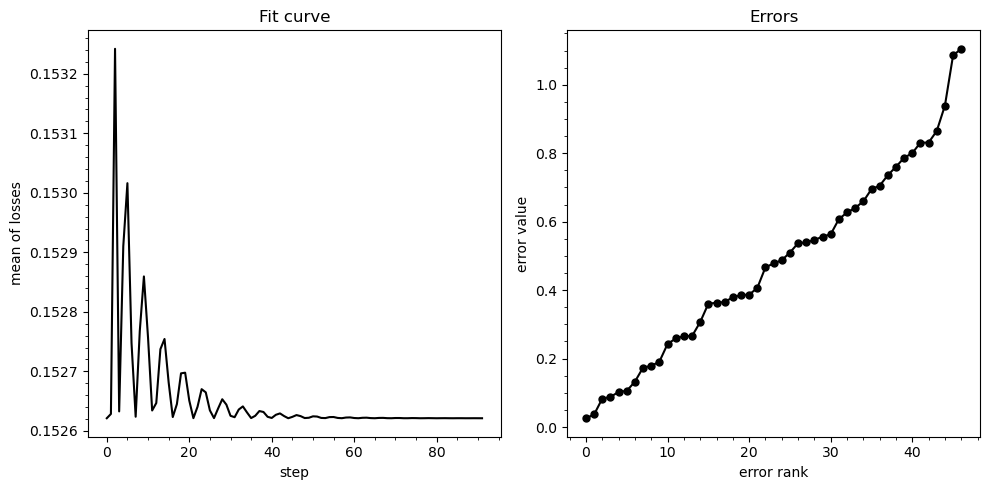

In [23]:
regr_ls = regr.regression(Xs, Y, mod_ls, h=0.01, n_iter=5000)
regr.plot_losses_and_errors(regr_ls, Xs, Y)

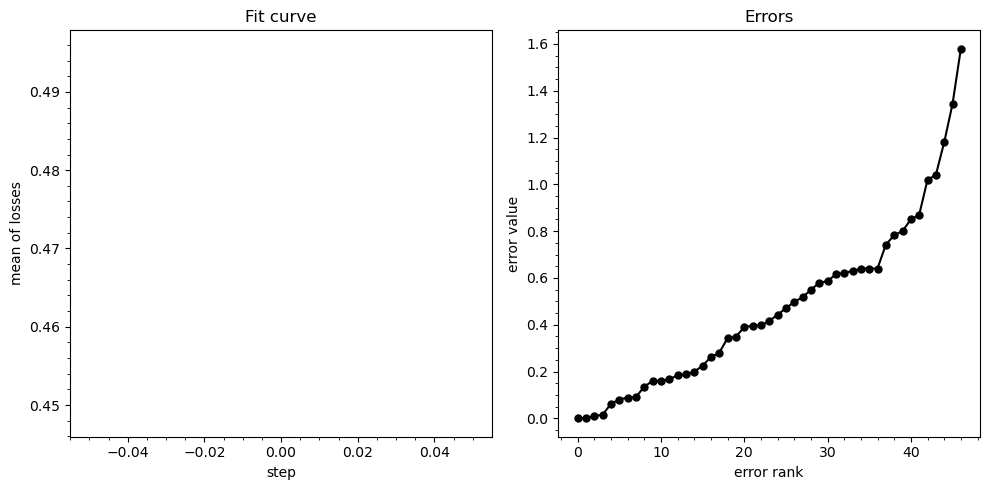

In [21]:
regr_r = regr.r_regression_irls(Xs, Y, mod_r, funcs.Sqrt(0.001), h=0.01, n_iter=5000)
regr.plot_losses_and_errors(regr_r, Xs, Y)

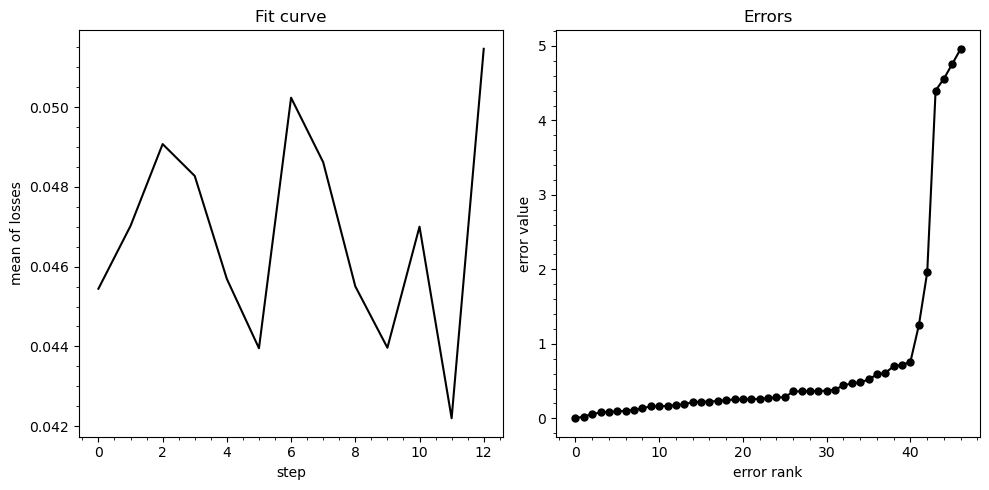

In [20]:
avrfunc_m = regr.averaging_function("M", funcs.Sqrt(0.01))
regr_m = regr.m_regression_irls(Xs, Y, mod_m, agg_func=avrfunc_m, h=0.001, n_iter=5000)
regr.plot_losses_and_errors(regr_m, Xs, Y)

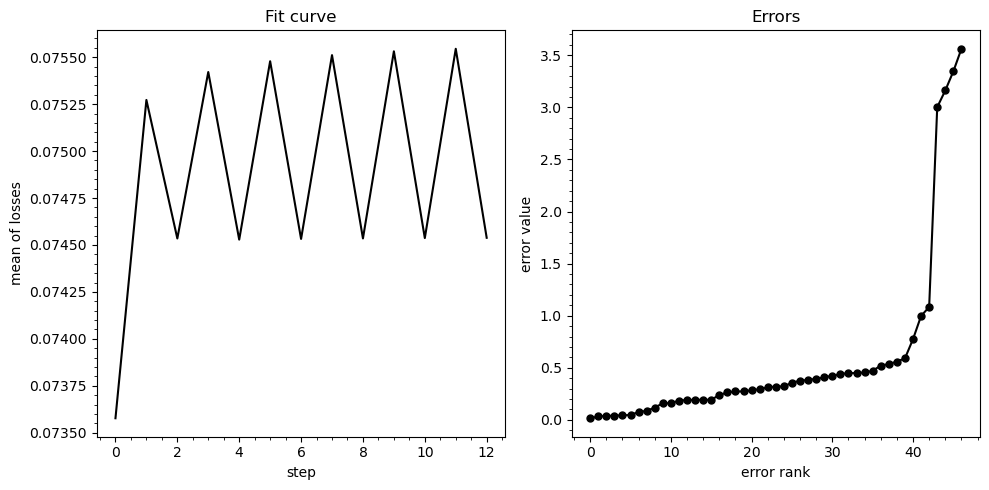

In [19]:
avrfunc_wm = regr.averaging_function("WM", funcs.quantile_func(alpha, funcs.Sqrt(0.01)))
regr_wm = regr.m_regression_irls(Xs, Y, mod_wm, agg_func=avrfunc_wm, h=0.01, n_iter=5000)
regr.plot_losses_and_errors(regr_wm, Xs, Y)

In [10]:
X_wo, Y_wo = regr.exclude_outliers(mod_wm, log_Te, log_light, 6)

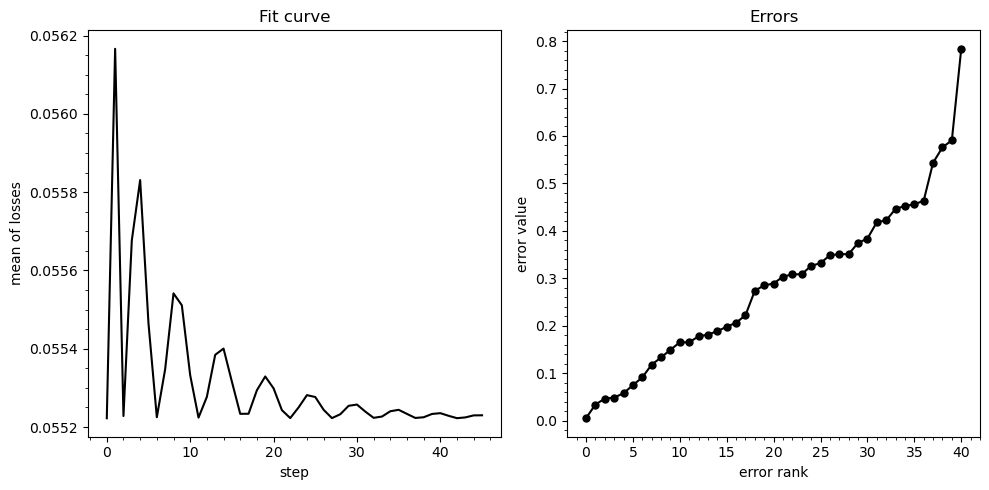

In [17]:
regr_ls2 = regr.regression(X_wo[:,None], Y_wo, mod_ls2, h=0.01, n_iter=5000)
regr.plot_losses_and_errors(regr_ls2, X_wo[:,None], Y_wo)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


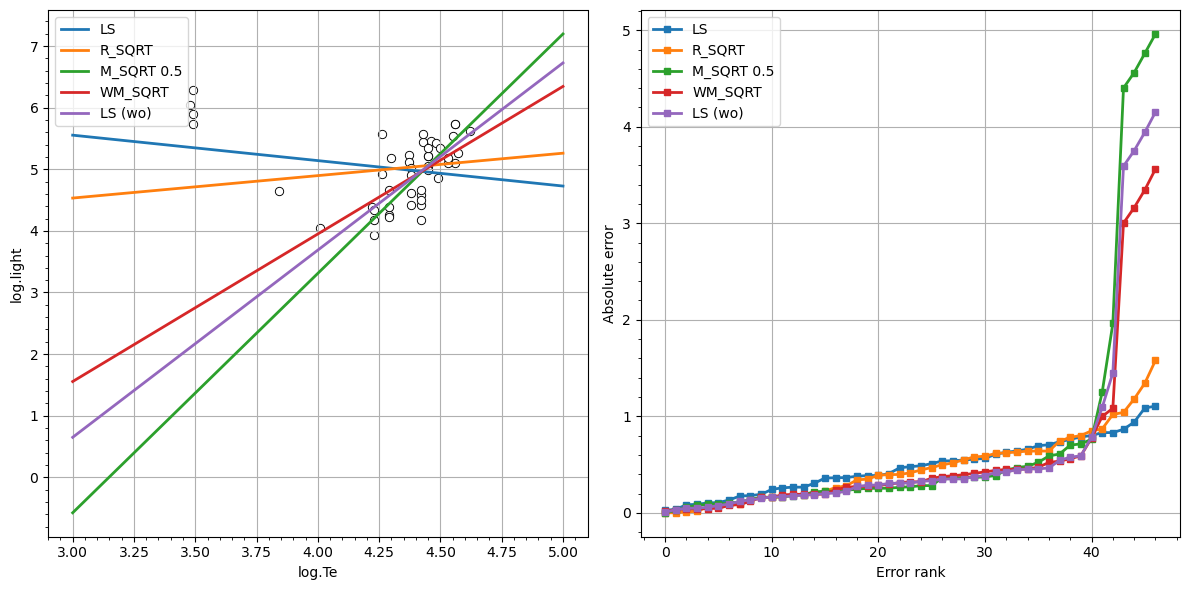

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(log_Te, log_light, s=36, c='w', edgecolors='k', linewidth=0.66)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.plot([3,5], mod_ls.evaluate_all([3,5]), label='LS', linewidth=2.)
plt.plot([3,5], mod_r.evaluate_all([3,5]), label='R_SQRT', linewidth=2.)
plt.plot([3,5], mod_m.evaluate_all([3,5]), label='M_SQRT 0.5', linewidth=2.)
plt.plot([3,5], mod_wm.evaluate_all([3,5]), label='WM_SQRT', linewidth=2.)
plt.plot([3,5], mod_ls2.evaluate_all([3,5]), label='LS (wo)', linewidth=2.)
plt.legend()
plt.minorticks_on()
plt.grid(1)
plt.subplot(1,2,2)
plt.plot(sorted(np.abs(Y-mod_ls.evaluate_all(X[:,None]))), label='LS', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_r.evaluate_all(X[:,None]))), label='R_SQRT', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_m.evaluate_all(X[:,None]))), label='M_SQRT 0.5', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_wm.evaluate_all(X[:,None]))), label='WM_SQRT', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_ls2.evaluate_all(X[:,None]))), label='LS (wo)', linewidth=2., marker='s', markersize=4)
plt.legend()
plt.minorticks_on()
plt.xlabel('Error rank')
plt.ylabel('Absolute error')
plt.grid(1)
plt.tight_layout()
plt.savefig('fig/rob_linregr_starsCYG.eps')
plt.show()

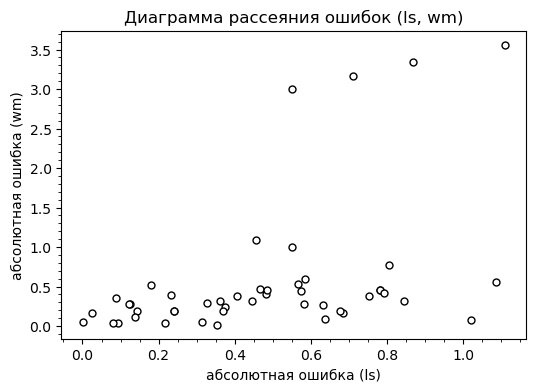

In [13]:
plt.figure(figsize=(6,4))
errs1 = np.abs(mod_ls.evaluate_all(log_Te[:,None]) - log_light)
errs2 = np.abs(mod_wm.evaluate_all(log_Te[:,None]) - log_light)
plt.title('Диаграмма рассеяния ошибок (ls, wm)')
plt.scatter(errs1, errs2, s=25, c='w', edgecolors='k')
# plt.savefig('fig/simple_linear_regression_errs_roberrs.eps')
plt.xlabel('абсолютная ошибка (ls)')
plt.ylabel('абсолютная ошибка (wm)')
plt.minorticks_on()
plt.show()

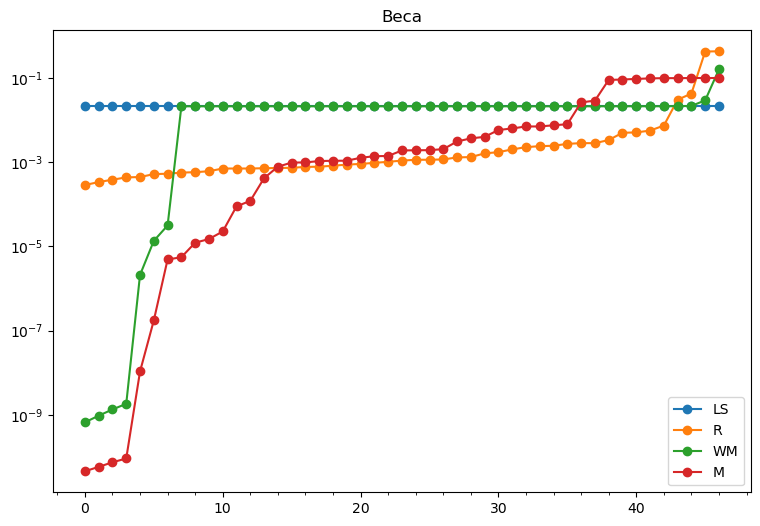

In [14]:
plt.figure(figsize=(9,6))
plt.title("Веса")
regr.plot_sample_weights(regr_ls, 'LS')
regr.plot_sample_weights(regr_r, 'R')
regr.plot_sample_weights(regr_wm, 'WM')
regr.plot_sample_weights(regr_m, 'M')
plt.minorticks_on()
plt.gca().set_yscale('log')
plt.legend()
plt.show()

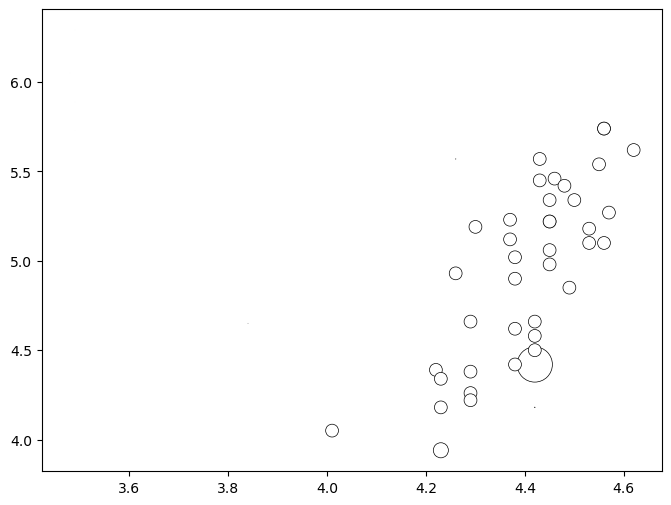

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, s=4000.*regr_wm.sample_weights, c='w', edgecolors='k', linewidth=0.5)
plt.show()